# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")


import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [12]:
# Your code here.

student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

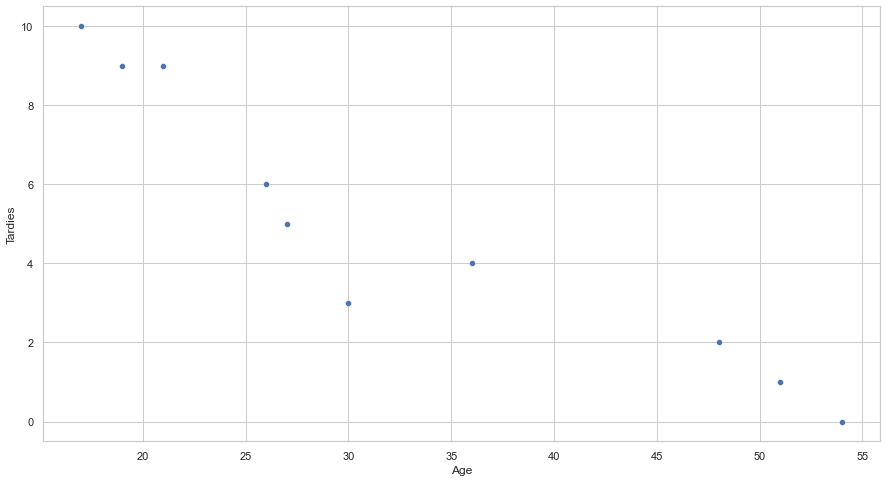

In [21]:
# Your code here.

sns.scatterplot(x=student_data["Age"], y=student_data["Tardies"]);


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Your response here. 
"""
It seems like there is a relation between the variables Age and Tardies. The younger students are the most tardies. 

"""

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [16]:
# Your response here.

student_data.corr()

"""
Un valor menor que 0 indica que existe una correlación negativa, es decir, que las dos variables están asociadas
en sentido inverso. Cuanto más se acerca a -1, mayor es la fuerza de esa relación invertida (cuando el valor en una 
sea muy alto, el valor en la otra será muy bajo).
"""

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [17]:
student_data.cov()
"""

Vemos que hay una covarianza negativa lo cual implica que a medida que aumentan los años, 
disminuyen las veces que llega tarde la persona.

"""


,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [23]:
# Your response here.
lr = LinearRegression()

lr.fit(
    X = student_data[["Age"]], #siempre es un dataframe por eso pongo doble corchete
    y = student_data.Tardies #es una serie de pandas
)


LinearRegression()

Plot your regression model on your scatter plot.

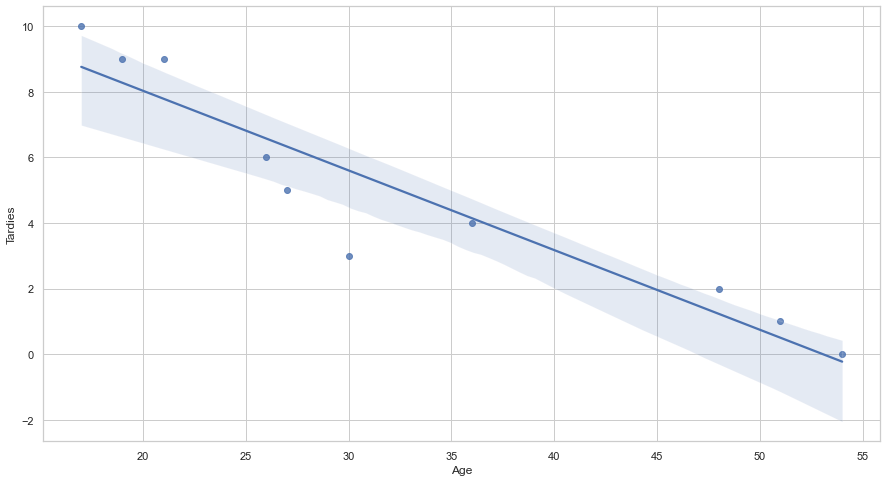

In [24]:
# Your code here.
sns.regplot(x="Age", y="Tardies", data=student_data);

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [27]:
# Your response here. 

results = smf.ols("Age ~ Tardies", data = student_data).fit()
results.summary()

/opt/anaconda3/envs/ironhack/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           5.57e-05
Time:                        16:44:33   Log-Likelihood:                -29.149
No. Observations:                  10   AIC:                             62.30
Df Residuals:                       8   BIC:                             62.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.6988      2.791     18.168      0.000      44.264      57.134
Tardies       -3.6324      0.470     -7.734      0.000      -4.716      -2.549
==============================================================================
Omnibus:                        3.472   Durbin-Watson:                   2.182
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                1.714
Skew:                          -1.010   Prob(JB):                        0.424
Kurtosis:                       2.812   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
"""
As the value of R-squared is 0.882, the 88% of the variability of student_data can be explained with the model.
"""

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [37]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')
vehicles = vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year","CO2 Emission Grams/Mile"]]
vehicles

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500
...,...,...,...,...,...,...
35947,2013,3.0,9.155833,36,1100,244.000000
35948,2014,3.0,9.155833,36,1100,243.000000
35949,2015,3.0,9.155833,36,1100,244.000000
35950,2016,3.0,9.155833,36,1100,246.000000


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [38]:
# Your response here. 
vehicles.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


In [ ]:
"""
La variable más importante en determinar las emisiones de CO2 es "Fuel Barrels/Year" con una correlación de 0.98.
Por otro lado, la que está menos relacionada con las emisiones es la variable "Year", con una correlación de -0.22.
"""

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [45]:
lr = LinearRegression()

lr.fit(
    X = vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]], #siempre es un dataframe por eso pongo doble corchete
    y = vehicles["CO2 Emission Grams/Mile"] #es una serie de pandas
)


LinearRegression()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [49]:
vehicles.columns = [i.replace(" ", "_").replace("/", "") for i in vehicles.columns]

In [50]:
# Your response here. 

results = smf.ols("CO2_Emission_GramsMile ~ Year + Cylinders + Fuel_BarrelsYear + Combined_MPG + Fuel_CostYear", data = vehicles).fit()
results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     CO2_Emission_GramsMile   R-squared:                       0.981
Model:                                OLS   Adj. R-squared:                  0.981
Method:                     Least Squares   F-statistic:                 3.687e+05
Date:                    Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                            17:28:49   Log-Likelihood:            -1.5173e+05
No. Observations:                   35952   AIC:                         3.035e+05
Df Residuals:                       35946   BIC:                         3.035e+05
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          769.8883     19.392     39.702      0.000     731.880     807.897
Year                -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders            1.8788      0.083     22.598      0.000       1.716       2.042
Fuel_BarrelsYear    19.0529      0.061    311.600      0.000      18.933      19.173
Combined_MPG        -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel_CostYear        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
"""
El valor de R-squared es 0.981, lo que indica que la variabilidad de los datos queda exaplicada un 98% con el modelo.

La variable más relacionada con las emisiones de CO2 es "Fuel_BarrelsYear" (coef = 19.05).


Como todos los p-valor <0.05 podemos decir que todas las variables tienen un efecto sobre las emisiones de CO2,
por tanto,se rechaza la hipótesis nula. 

"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [54]:
# Your code here. 

party = pd.DataFrame({'Invited': [1,3,4,6,8,9,11,14], 'Attended': [1,2,4,4,5,7,8,13]})
party

,Invited,Attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

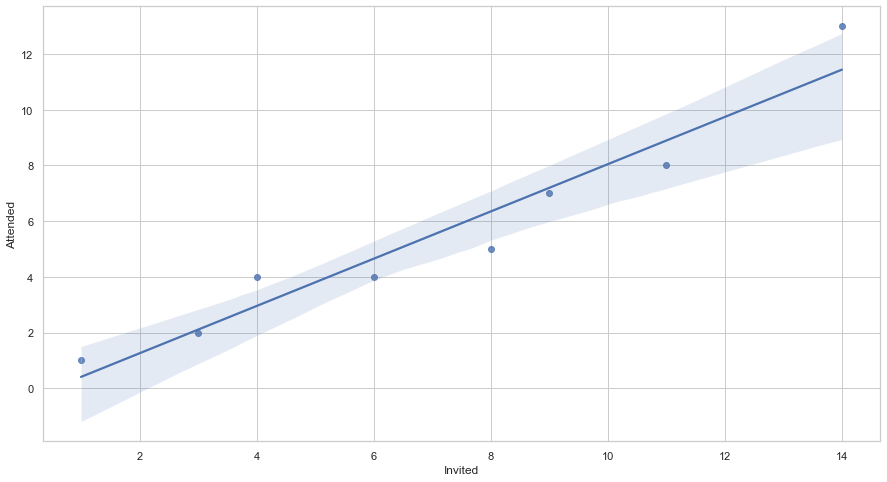

In [57]:
# Your code here.

sns.regplot(x="Invited", y="Attended", data=party);

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

"""
Existe una relación positiva entre las variables "Invited" y "Attended". 
Conforme aumenta el valor de "Invited" aumentan los "Attended"
"""

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [59]:
# Your response here. 

def gimme_the_outliers(s):
    Q1 = s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3-Q1
    min_v = Q1 - (1.5 * IQR)
    max_v = Q3 + (1.5 * IQR)
    
    return [value for value in s if ((value < min_v) or (value>max_v))]

In [62]:
gimme_the_outliers(party.Attended)

[13]

In [63]:
party

,Invited,Attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


In [64]:
party.drop([7], axis=0, inplace=True)

In [65]:
party

,Invited,Attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

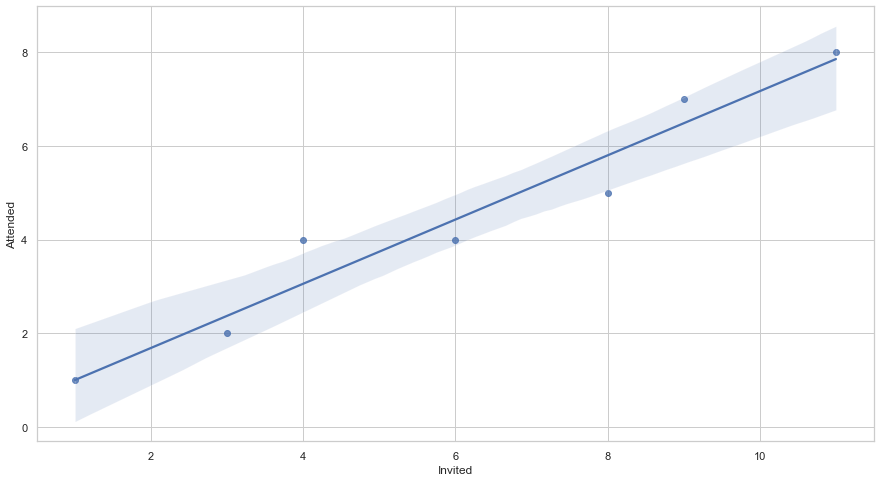

In [66]:
# Your response here. 
sns.regplot(x="Invited", y="Attended", data=party);

In [ ]:
"""
Eliminar uno de los outliers no ha cambiado demasiado el modelo respecto al anterior.
"""